In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('cleaned_transactions.csv')
df.head()

,transaction_id,user_id,transaction_date,amount,payment_method,device,payment_status,failure_reason,retry_count,recovered_flag,recovery_status,revenue_lost,revenue_recovered,retry_bucket
0,1,1860,2024-05-24,1324.34,Debit Card,iOS,success,no_failure,0,0,success,0.00,0.0,no_retry
1,2,4772,2024-04-04,2237.72,Credit Card,iOS,success,no_failure,0,0,success,0.00,0.0,no_retry
2,3,4092,2024-02-02,3190.09,Debit Card,Web,success,no_failure,0,0,success,0.00,0.0,no_retry
3,4,1466,2024-02-25,940.45,Credit Card,Android,failed,network_error,0,0,lost,940.45,0.0,no_retry
4,5,5426,2024-05-04,3846.30,Credit Card,Web,success,no_failure,0,0,success,0.00,0.0,no_retry


Overall Payment Failure Rate

In [2]:
total_txns = len(df)
failed_txns = df[df['payment_status'] == 'failed'].shape[0]

failure_rate = (failed_txns / total_txns) * 100
failure_rate

15.27

Failure Rate by Payment Method

In [3]:
failure_rate_method = (
    df.groupby('payment_method')
    .apply(lambda x: (x['payment_status'] == 'failed').mean() * 100)
    .reset_index(name='failure_rate_pct')
)

failure_rate_method

/tmp/ipython-input-1700316976.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['payment_status'] == 'failed').mean() * 100)


,payment_method,failure_rate_pct
0,Credit Card,15.659679
1,Debit Card,15.933555
2,Net Banking,14.144317
3,UPI,15.021231
4,Wallet,14.206514


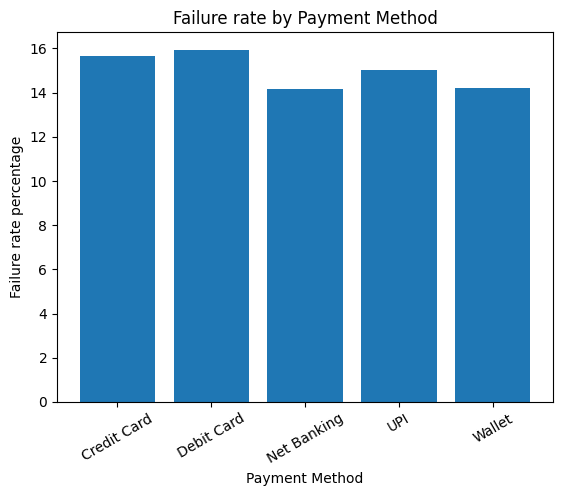

In [6]:
plt.figure()
plt.bar(failure_rate_method['payment_method'],
        failure_rate_method['failure_rate_pct'])
plt.title('Failure rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Failure rate percentage')
plt.xticks(rotation=30)
plt.show()

Failure Reasons Distribution

In [7]:
failure_reasons = (
    df[df['payment_status'] == 'failed']
    .groupby('failure_reason')
    .size()
    .reset_index(name='count')
)

failure_reasons

,failure_reason,count
0,bank_decline,693
1,insufficient_funds,1405
2,network_error,1591
3,timeout,892


([<matplotlib.patches.Wedge at 0x79eae631eb10>,
 [Text(1.1559314026754133, 0.5948298851847068, 'bank_decline'),
  Text(-0.3701904589291961, 1.0358373540849892, 'insufficient_funds'),
  Text(-0.7447467293728737, -0.8095383308333263, 'network_error'),
  Text(0.9005261718272085, -0.6317061135165887, 'timeout')],
 [Text(0.7113424016464082, 0.36604916011366573, '15.1%'),
  Text(-0.20192206850683422, 0.5650021931372667, '30.7%'),
  Text(-0.4062254887488401, -0.4415663622727234, '34.7%'),
  Text(0.4911960937239318, -0.3445669710090484, '19.5%')])

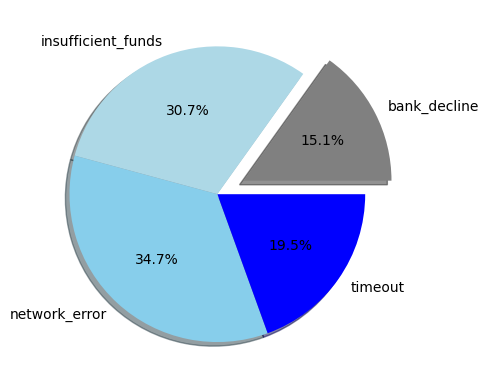

In [14]:
colors=['grey','lightblue','skyblue','blue']
explode=(0.2,0,0,0)
plt.pie(failure_reasons['count'],explode=explode,labels=failure_reasons['failure_reason'],colors=colors,autopct='%1.1f%%',shadow=True)

Failure Rate By Device

In [15]:
failure_rate_device = (
    df.groupby('device')
    .apply(lambda x: (x['payment_status'] == 'failed').mean() * 100)
    .reset_index(name='failure_rate_pct')
)

failure_rate_device

/tmp/ipython-input-3464822167.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['payment_status'] == 'failed').mean() * 100)


,device,failure_rate_pct
0,Android,15.111940
1,Web,15.019106
2,iOS,15.702664


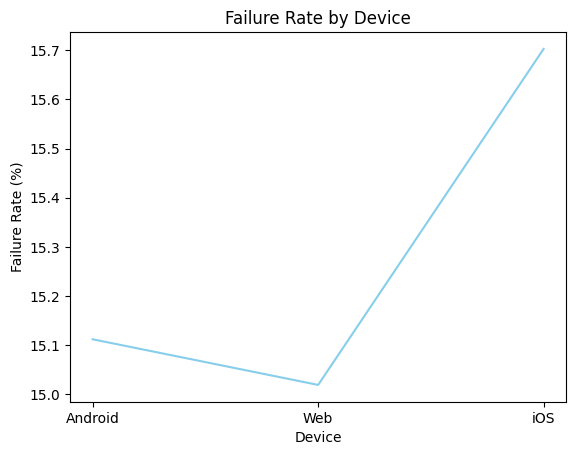

In [17]:
plt.figure()
plt.plot(failure_rate_device['device'], failure_rate_device['failure_rate_pct'],color='skyblue')
plt.title('Failure Rate by Device')
plt.xlabel('Device')
plt.ylabel('Failure Rate (%)')
plt.show()